We Considered India As a State So as to maintain Homogeneity in the code

In [257]:
## Training without noise
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import matplotlib
from keras.models import model_from_json
import keras
import seaborn as sns
from keras.models import Sequential
from keras.losses import MSE
import math
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from torch.nn import Conv1d
%matplotlib inline
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.externals.joblib import Parallel, delayed
from sklearn.datasets.base import Bunch
from sklearn import clone
from sklearn.preprocessing import normalize
from torch.nn import Parameter
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVC
from torch.nn import parameter
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from keras.models import Sequential
from keras.layers import Dense
import torch.optim as optim
from keras.layers import LSTM
from sklearn. preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from collections import defaultdict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from scipy.stats import describe
import torch
import torch.nn as nn
from keras.layers import Activation
import torch.nn.functional as F

In [258]:
cd "C:\Users\aman\Desktop\Covid!9-Assignment"

C:\Users\aman\Desktop\Covid!9-Assignment


In [259]:
data_countries = pd.read_csv("train.csv")
df_corona_in_india = pd.read_csv("covid_19_india.csv")
df_corona_in_india.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [260]:
np.unique(np.array(df_corona_in_india["State/UnionTerritory"]))

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Delhi', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu and Kashmir', 'Jharkhand', 'Karnataka',
       'Kerala', 'Ladakh', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Nagaland#', 'Odisha',
       'Puducherry', 'Punjab', 'Rajasthan', 'Tamil Nadu', 'Telengana',
       'Tripura', 'Unassigned', 'Uttar Pradesh', 'Uttarakhand',
       'West Bengal'], dtype=object)

In [261]:
#Only states with Corona Cases over 500 taken into consideration
states_under_study = ["India" , 'Uttar Pradesh','Delhi', 'Gujarat', 'Maharashtra', 'Rajasthan', 'Tamil Nadu','Kerala', 'Andhra Pradesh','Madhya Pradesh', 'Telengana', 'Karnataka']

In [262]:
dict_statesConf = defaultdict(list)
dict_statesFat = defaultdict(list)
for i in range(0, len(df_corona_in_india)):
    if(df_corona_in_india.iloc[i]["State/UnionTerritory"] in states_under_study):
        dict_statesConf[df_corona_in_india.iloc[i]["State/UnionTerritory"]].append(df_corona_in_india.iloc[i]["Confirmed"])
        dict_statesConf[df_corona_in_india.iloc[i]["State/UnionTerritory"]].append(df_corona_in_india.iloc[i]["Deaths"])

In [263]:
data_countries = pd.read_csv("train.csv")
for i in range(0, len(data_countries)):
    if(data_countries.iloc[i]["Country_Region"] == "India"):
        dict_statesConf[data_countries.iloc[i]["Country_Region"]].append(data_countries.iloc[i]["ConfirmedCases"])

Ratio of losses of LSTM and Naive Method for state India is 0.493997


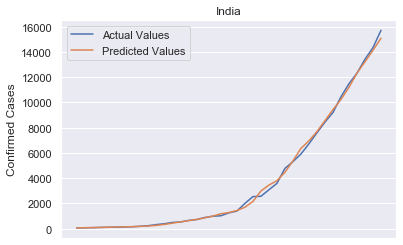

Ratio of losses of LSTM and Naive Method for state Uttar Pradesh is 0.863376


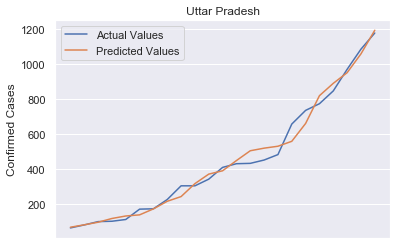

Ratio of losses of LSTM and Naive Method for state Delhi is 1.116176


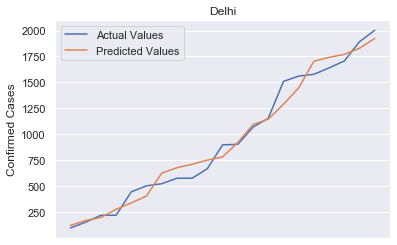

Ratio of losses of LSTM and Naive Method for state Gujarat is 0.728725


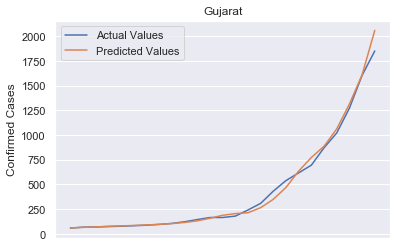

Ratio of losses of LSTM and Naive Method for state Maharashtra is 0.746926


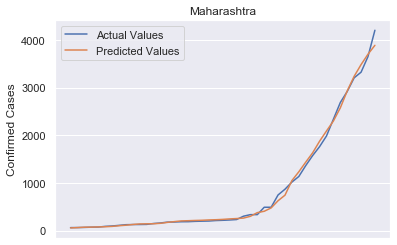

Ratio of losses of LSTM and Naive Method for state Rajasthan is 0.578908


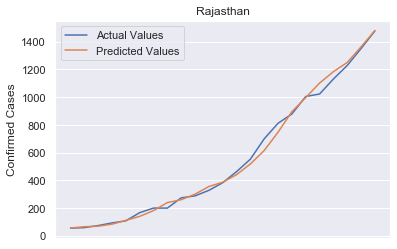

Ratio of losses of LSTM and Naive Method for state Tamil Nadu is 0.630456


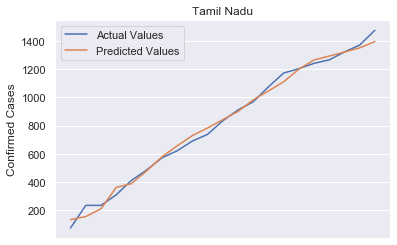

Ratio of losses of LSTM and Naive Method for state Kerala is 0.788419


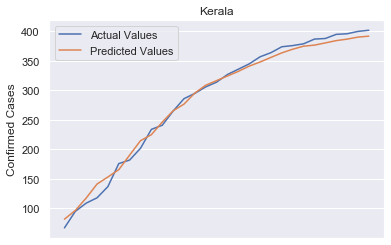

Ratio of losses of LSTM and Naive Method for state Andhra Pradesh is 1.283570


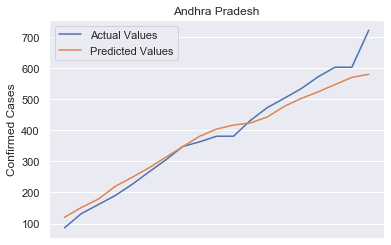

Ratio of losses of LSTM and Naive Method for state Madhya Pradesh is 1.493639


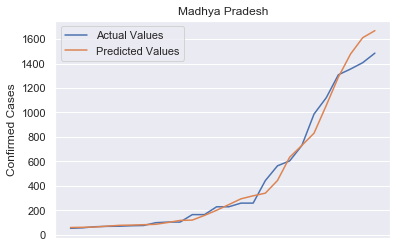

Ratio of losses of LSTM and Naive Method for state Telengana is 0.873528


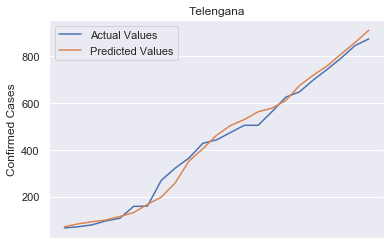

Ratio of losses of LSTM and Naive Method for state Karnataka is 0.748548


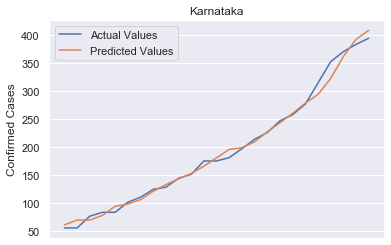

In [265]:
#Analysis carried for Confirmed Cases Only

for state in states_under_study:
    #sorting to get number of cases in order of dates
    state_data1 = np.array(sorted(dict_statesConf[state]))
    
    #Considering Cases Of Each State Only after Number of Cases crosed 50(From 1 case before crossing 50)
    k = 0
    for i in range(0, len(state_data1)):
        if(state_data1[i]>50):
#             print(i)
            k = i-1
            lst = state_data1[k-1]
            break
    state_data1 = state_data1[k:]

    
    #Calculating Naive Losses
    s = 0
    for i in range(0, len(state_data1)):
        s+= abs(state_data1[i] - lst)
        lst = state_data1[i]
#         print(s)
    naive_loss = s/(len(state_data1))
    #Preprocessing Dataset 
    
    #Taking logarithm base 2 considering exponential behavior of the disease
    state_data = []
    for i in state_data1:
        state_data.append(math.log2(i))
    
    #Sccaling input between -1 and 1
    state_data = np.array(state_data)
    scaler = MinMaxScaler(feature_range=(0, 1))
    dataset = scaler.fit_transform(state_data.reshape([-1,1]))
    # dataset = dataset.reshape([-1])
    
    #converting dataset to time series use case
    #Using 2 as time step for our LSTM
    lookback= 2
    
    def create_dataset(dataset, look_back=1):
        dataX, dataY = [], []
        for i in range(len(dataset)-look_back-1):
            a = dataset[i:(i+look_back)]
            dataX.append(a)
            dataY.append(dataset[i + look_back])
        return np.array(dataX), np.array(dataY)
    trax,tray = create_dataset(dataset, lookback)
    tray = tray.reshape([tray.shape[0],1])

    #Training the model
    model = Sequential()
    model.add(LSTM(20))
    model.add(Dense(10, activation = "relu"))
    model.add(Dense(1))
    model.compile(loss= "mean_squared_error" , optimizer="adam")
    trax = trax.reshape([trax.shape[0],1,trax.shape[1]])
    model.fit(trax,tray, epochs = 200, verbose = 0,batch_size=10)
    
    #Inverse_preprocessing the predictions and inputs
    tray = 2**(scaler.inverse_transform(tray))
    trainPredict = 2**scaler.inverse_transform(model.predict(trax))
    lossTr = math.sqrt(mean_squared_error(trainPredict,tray))
    
    print("Ratio of losses of LSTM and Naive Method for state %s is %f"%(state, lossTr/naive_loss))
    
    plt.plot(tray)
    plt.plot(trainPredict)
    plt.title(state)
    plt.xticks([])
    plt.legend(("Actual Values", "Predicted Values"))
    
    plt.ylabel("Confirmed Cases")
    plt.show()